In [1]:
import networkx as nx

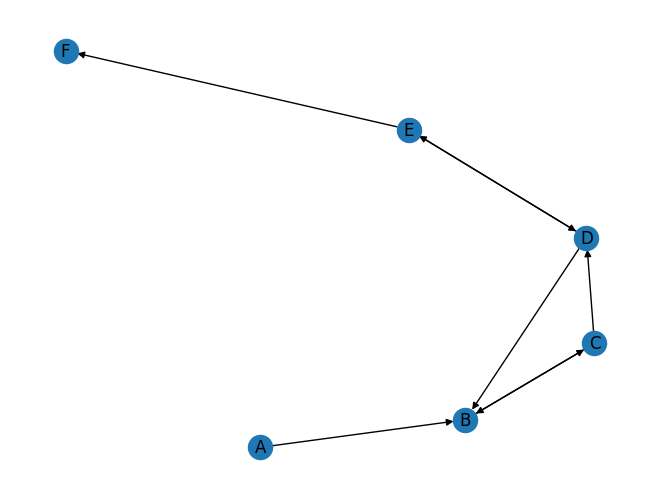

In [20]:
# Build graph from our example
graph = nx.DiGraph()

# Nodes
graph.add_node('A')
graph.add_node('B')
graph.add_node('C')
graph.add_node('D')
graph.add_node('E')
graph.add_node('F')

# Edges
graph.add_edge('A','B')
graph.add_edge('B','C')
graph.add_edge('C','B')
graph.add_edge('C','D')
graph.add_edge('D','B')
graph.add_edge('D','E')
graph.add_edge('E','D')
graph.add_edge('E','F')

nx.draw(graph, pos=nx.spiral_layout(graph), with_labels = True)

In [25]:
# Every edge is defined by concatenating the node IDs
# NOTE: Leads to redundant directionally unique nodes, 
# which must then be contracted
def nodify(u,v):
    return u + '_' + v

def invert_node(node):
    u, v = node.split('_')[1], node.split('_')[0]
    return nodify(u, v)

# Edges as nodes graph
edge_node_graph = nx.DiGraph()
for i, node in enumerate(graph.nodes()):
    for (u,v) in graph.out_edges(node):
        new_out_edge_node = nodify(u,v)
        edge_node_graph.add_node(new_out_edge_node)
        for u_neighbor, v_neighbor in graph.out_edges(v):
            neighbor = nodify(u_neighbor, v_neighbor)
            edge_node_graph.add_node(neighbor)
            edge_node_graph.add_edge(new_out_edge_node, neighbor)

# NOTE: Deals with redundant nodes i.e.
# A_B <-> B_A is actually a singled node
for i, node in enumerate(edge_node_graph.nodes()):
    inverse_node = invert_node(node)
    if edge_node_graph.has_node(inverse_node):
        edge_node_graph = nx.contracted_nodes(edge_node_graph, inverse_node, node)

# Now, all contracted edges have self loops, 
# which can be removed
edge_node_graph.remove_edges_from(nx.selfloop_edges(edge_node_graph))

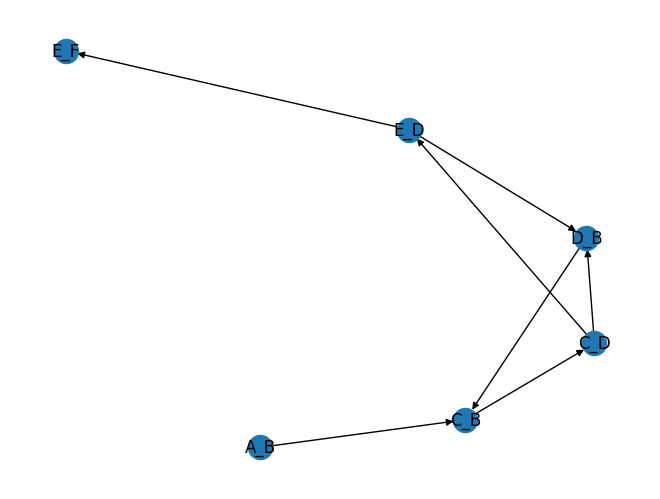

In [26]:
nx.draw(edge_node_graph, pos=nx.spiral_layout(edge_node_graph), with_labels = True)